# Chapter 5
# Numerical Integration and Differentiation

## 5.6 Numerical Differentiation

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/18/Derivative.svg/460px-Derivative.svg.png)


The most natural way to approximate a derivative is to replace it with a finite difference.
The definition of a derivative,

$$ f'(x)=\lim _{{h\to 0}}{f(x+h)-f(x) \over h}. $$

suggests a natural way to do this. One can simply take h to be a small number, knowing
that, for h small enough, the error of the approximation will also be small. We will return
to the question of how small h should be, but first we address the issue of how large an error
is produced using this finite difference approach.


An error bound for the approximation can be be obtained using a Taylor expansion. We
know, for example, that
$$f(x + h) = f(x) + f'(x)h + O(h^2);$$

where $O(h^2)$ means that other terms in the expression are expressible in terms of second or
higher powers of h. If we rearrange this expression we see that

$$f'(x) = [f(x + h) - f(x)]/h + O(h)$$

(since $O(h^2)/h = O(h)$), so the approximation to the derivative $f'(x)$ has an $O(h)$ error.

### A more accurate finite difference approximation



Another two-point formula is to compute the slope of a nearby secant line through the points $(x-h,f(x-h))$ and $(x+h,f(x+h))$. The slope of this line is
$$f'(x) =    {\displaystyle {f(x+h)-f(x-h) \over 2h } + O(h^2) .} $$
This formula is known as the symmetric difference quotient. In this case the first-order errors cancel, so the slope of these secant lines differ from the slope of the tangent line by an amount that is approximately proportional to ${\displaystyle h^{2}}$. Hence for small values of h this is a more accurate approximation to the tangent line than the one-sided estimation. 

This is called the **centered finite difference approximation** to the derivative of $f$ at $x$. Its
error is $O(h^2)$, or one order more accurate than the one-sided finite difference approximation
above.



Other 3-point approximations are also possible.

### Special cases for finite difference approximations

Let's consider a formula that is useful when a derivative is needed at a boundary of a domain. In this case

$$f'(x) = {1 \over 2h} [-3f(x) + 4f(x + h) - f(x + 2h)] + O(h^2)$$
(use h > 0 for a lower bound and h < 0 for an upper bound).






### **Finite difference approximations** for higher order derivatives 

They can be found using a similar
approach. For, example an order $O(h^2)$ centered finite difference approximation to the second
derivative may be constructed using the two third-order Taylor expansions

$$f''(x) = {f(x + h) - 2f(x) + f(x - h) \over h^2} + O(h^2)$$

To obtain general formulas for second order derivatives with second order accuracy, we will (in general) require a weighted sum
composed of 4 points.

A formula that is useful when a derivative is needed at a boundary of the
domain is


$$f''(x) ={1 \over h^2} [2f(x) - 5f(x + h) + 4f(x + 2h) - f(x + 3h)] + O(h^2)$$



### Computing Hessian matrices


An important use of second derivatives is in computing Hessian matrices. Given some
function $f : R^n \rightarrow R$, the Hessian is the $n \times n$ matrix of second partial derivatives, the $ij$th element of which is ${ \partial^2 f(x)\over  \partial x_i \partial x_j}$
. We consider only centered, evenly spaced approximations, which
can be obtained as a weighted sum of the function values evaluated at the point x and 8
points surrounding it obtained by adding or subtracting $h_i u_i$ and/or $h_j u_j$, where the h terms
are scalar step increments and the u terms are n-vectors of zeros but with the ith element
equal to 1 (the $i$th column of $I_n$).

Let superscripts on $f$ denote the function evaluated at one
of the 9 points of interest, so $f^{++} = f(x + h_i u_i + h_j u_j)$, $f^{00} = f(x), f^{0-} = f(x - h_j u_j)$, etc.


A fruitful approach is to take the mean of the results of two different approximations, which leads to:

$$f_{ij} \approx {1 \over 4h_i h_j} (f^{++} + f^{--} - f^{-+} -  f^{+-})$$

This requires less computation than the other two forms if only a single cross partial is
evaluated. Using either of the other two schemes, however, along with the usual centered
approximation for the diagonal terms of the Hessian enables one to compute the entire
Hessian with second order accuracy in $1 + n + n^2$ function evaluations.


### The errors in the approximations
When a function can be evaluated at any point, the choice of evaluation points must be
considered. As with convergence criteria, there is no one rule that always works. If **$h$ is
made too small, round-off error can make the results meaningless**. On the other hand, too
large an $h$ provides a poor approximation, even if exact arithmetic is used.

This gives credence to the rule of
thumb that, for one-sided approximations, $h$ should be chosen to be of size $\epsilon$ relative to
$x$. When $x$ is small, however, it is better not to let $h$ get too small. We suggest the rule of
thumb of setting 

$$h = max(x, 1) \sqrt{ \epsilon} $$


It is evident that the
error is minimized at a much higher value of h, at approximately $\sqrt[3]{\epsilon}$. A good rule of thumb
is to set

$$h = max(x, 1) \sqrt[3]{ \epsilon} $$


In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
import sympy
sympy.init_printing()

d1: [-1.08768136 -2.76493348 -4.55236612 -3.08655962 -3.71978493 -4.50352056
 -5.08347724 -6.20012289 -8.02365956 -7.94324246 -7.26839186 -6.61658741
 -5.86671817 -5.11673161 -4.36673086 -3.61670977 -2.86659074 -2.11592106
 -1.36214557 -0.59060781  0.29058936]
d2: [ -1.73141555  -1.59838372  -2.323369    -3.36739664  -3.92261842
  -4.72779964  -5.45847406  -6.20910324  -7.09356021  -7.55145443
  -8.32323908  -9.3352109  -10.04225716 -10.62904948  -9.34034617
  -7.8438797   -6.34385691  -4.84385608  -3.34383505  -1.84317011
  -0.32216846]


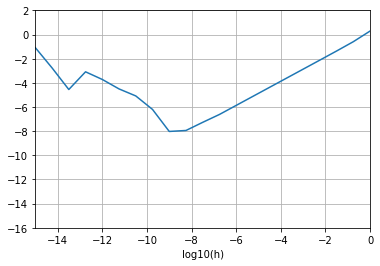

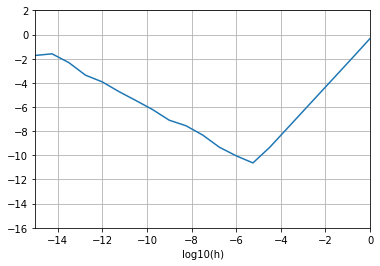

In [2]:
#Errors in Finite Difference Derivatives for the exp(x) function

#Specify the point where we are computing the derivative
x = 1

#Generate a grid of (small) values for the increment h
n = 21

#Consider a uniform grid
ctemp = np.linspace(0, 15, n)
ctemp = -ctemp

#Sort the values
c = sorted(ctemp)

#Create the powers of 10
h = np.power(10, c)

#One-sided finite difference derivative
u1 = x+h
l1 = x
num1 = np.exp(u1)-np.exp(l1)
den1 = (u1-l1)

d1 = np.divide(num1, den1)
d1 = d1-np.exp(x) #Subtract the true derivative to obtain the error
d1 = np.absolute(d1)
d1 = np.log10(d1)

#One-sided finite difference derivative errors
print("d1:",d1)

epstemp = np.finfo(float).eps

e1 = epstemp**(0.5)
e1 = np.log10(e1)

#Two-sided finite difference derivative
u2 = x+h
l2 = x-h
num2=np.exp(u2)-np.exp(l2)
den2=(u2-l2)

d2 = np.divide(num2, den2)
d2 = d2-np.exp(x) #Subtract the true derivative to obtain the error
d2 = np.absolute(d2)
d2 = np.log10(d2)

print("d2:",d2)

e2 = epstemp**(1/3)
e2 = np.log10(e2)

#Plot the log10 Approximation Errors
plt.figure()
plt.plot(c, d1, label='One-Sided')
plt.xlabel('log10(h)')
plt.grid()
plt.axis([-15, 0, -16, 2])

plt.figure()
plt.plot(c, d2, label='Two-Sided')
plt.xlabel('log10(h)')
plt.grid()
plt.axis([-15, 0, -16, 2])

We provide below a function that computes two-sided finite difference approximations for
the Jacobian of an arbitrary function. For a real-valued function, $f :R^n \rightarrow R$, the output
is an $n \times 1$ vector (For a vector-valued function, $f :R^n \rightarrow R^m$, the output
is an $n \times m$ matrix):

In [3]:
#Compute the Jacobian with a finite difference method
def fdjac(func, x, *args, **kwargs):

    # if type(func(x, *args, **kwargs)) is tuple:
    #     F = lambda x: func(x, *args, **kwargs)[0]
    # else:
    #     F = lambda x: func(x, *args, **kwargs)
    F = lambda z: func(z, *args, **kwargs)

    x = x.flatten()
    dx = x.size
    f = F(x)
    df = f.size
    x = x.astype(float)

    ''' Compute Jacobian'''
    eps = np.spacing(1) 

    h = eps** (1/3) * np.maximum(abs(x), 1)
    xh0 = x - h
    xh1 = x + h
    h = xh1 - xh0
    fjac = np.zeros((dx, df))

    for j in range(dx):
        xx = x.copy()
        xx[j] = xh1[j]
        f1 = F(xx)

        xx[j] = xh0[j]
        f0 = F(xx)

        fjac[j] = np.squeeze((f1 - f0) / h[j])  # fixme doing this to deal with broadcasting

    return fjac.T

In [4]:
#Example with the Cournot model

def cournot(q):
    c = np.array([0.6, 0.8])
    eta = 1.6
    e = -1 / eta
    fval = np.sum(q)**e + e * np.sum(q)**(e-1)*(q) - np.diag(c).dot(q)
    return fval

f = cournot
x = np.array([0.2, 0.2])
#Using the finite difference function to approximate the Jacobian
fjac = fdjac(cournot,np.array([0.2, 0.2]) )
fjac

array([[-3.88977465, -0.5194381 ],
       [-0.5194381 , -4.08977465]])